<a href="https://colab.research.google.com/github/DevrajThokchom/ML-Lab/blob/main/exp_8/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading and Processing Data

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
df = pd.DataFrame(x, columns = iris.feature_names)
df['target'] = y

In [ ]:
print("\nDataset Info:")
print(f"Number of samples: {len(x)}")
print(f"Number of features: {x.shape[1]}")
print(f"Target classes: {iris.target_names}")


Dataset Info:
Number of samples: 150
Number of features: 4
Target classes: ['setosa' 'versicolor' 'virginica']


Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f"\nTraining set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")


Training set size: 120
Testing set size: 30


Standardising

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)
print(x_test)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)

[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]
 [ 0.59831066 -1.25582892  0.72969227  0.95664273]
 [ 0.72020757  0.30929911  0.44316389  0.4227026 ]
 [-0.74255534  0.98006827 -1.27600637 -1.31260282]
 [-0.98634915  1.20365799 -1.33331205 -1.31260282]
 [-0.74255534  2.32160658 -1.27600637 -1.44608785]
 [-0.01117388 -0.80864948  0.78699794  0.95664273]
 [ 0.23261993  0.75647855  0.44316389  0.55618763]
 [ 1.08589829  0.08570939  0.55777524  0.4227026 ]
 [-0.49876152  1.87442714 -1.39061772 -1.04563275]
 [-0.49876152  1.4272477  -1.27600637 -1.31260282]
 [-0.37686461 -1.47941864 -0.01528151 -0.24472256]
 [ 0.59831066 -0.58505976  0.78699794  0.4227026 ]
 [ 0.72020757  0.08570939  1.01622064  0.8231577 ]
 [ 0.96400139 -0.13788033  0.38585821  0.28921757]
 [ 1.69538284  1.20365799  1.36

Prediction

In [ ]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

Evaluation

In [ ]:
print("MODEL EVALUATION")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2%}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


MODEL EVALUATION

Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Optimal Value of K

In [ ]:
k_values = range(1,31)
train_accuracies = []
test_accuracies = []

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    train_pred = knn.predict(x_train)
    test_pred = knn.predict(x_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

In [ ]:
best_k = k_values[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)
print(f"\nBest K value: {best_k}")
print(f"Best accuracy: {best_accuracy:.2%}")


Best K value: 1
Best accuracy: 100.00%


Graphs

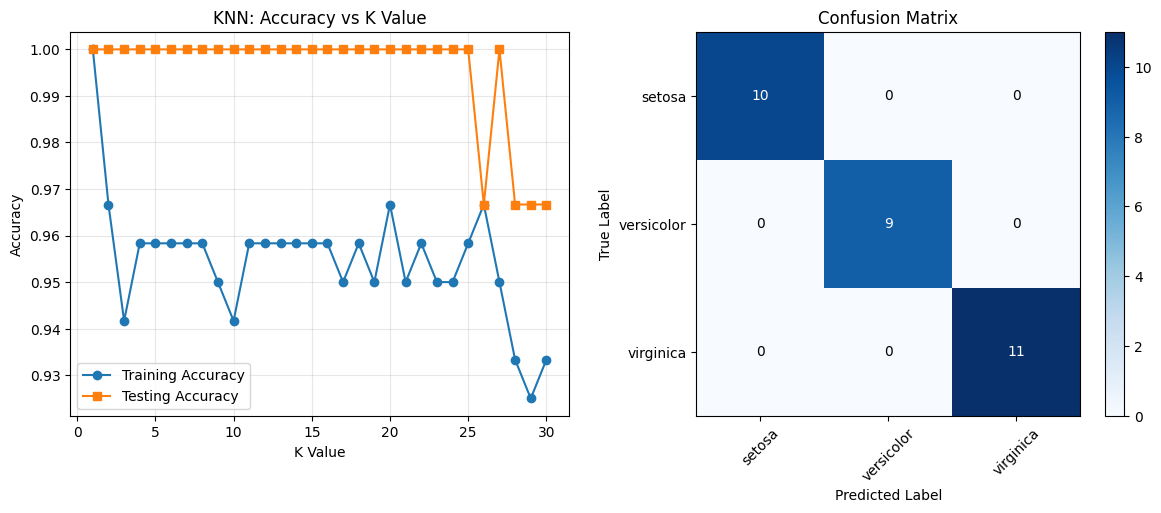


SINGLE SAMPLE PREDICTION

Sample features (scaled): [ 0.35451684 -0.58505976  0.55777524  0.02224751]
Predicted class: versicolor
Actual class: versicolor

Class Probabilities:
  setosa: 0.00%
  versicolor: 76.67%
  virginica: 23.33%


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Confusion Matrix Heatmap
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Make a prediction on a single sample
print("\n" + "="*50)
print("SINGLE SAMPLE PREDICTION")
print("="*50)

sample = x_test[0].reshape(1, -1)
prediction = knn.predict(sample)
probabilities = knn.predict_proba(sample)

print(f"\nSample features (scaled): {sample[0]}")
print(f"Predicted class: {iris.target_names[prediction[0]]}")
print(f"Actual class: {iris.target_names[y_test[0]]}")
print("\nClass Probabilities:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.2%}")


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']
